# GEOG 5160 6160 Lab 08

## Data processing

Let's start by by importing the modules we'll need for the class, then we'll go get the data

In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
## Set random seed for reproducibility
np.random.seed(1234)

### California housing data

We'll start by reading in and plotting the California housing dataset. The following code reads the file and cleans up the data. We then create two data sets to show how the algorithm works, one with only the coordinates as features, and the other with the usual set of house characteristics as features. The only new code here divides the house values by 1000 to help in displaying some of the output. Refer back to the previous labs for explanations of this code:

In [2]:
housing = pd.read_csv("../datafiles/housing.csv")
print(housing.shape)

(20640, 10)


In [3]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Next use the `dropna()` method to remove missing values:

In [4]:
housing = housing.dropna()
housing.shape

(20433, 10)

Next, we'll transform the data: a) convert the `ocean_proximity` variable into a simple binary and b) convert some of the numerical values

In [5]:
ocean_cats = housing.ocean_proximity != "INLAND" ## Conditional to make two groups inland vs all others
ocean_cats = ocean_cats.astype('category') ## Convert to categorical
ocean_cats = ocean_cats.cat.codes ## Extract the code numerical labels (0/1)
housing['ocean_new'] = ocean_cats ## Replace original ocean_proximity

In [6]:
housing['avg_rooms'] = housing.total_rooms / housing.households
housing['bedroom_ratio'] = housing.total_bedrooms / housing.total_rooms
housing.median_house_value = housing.median_house_value / 1000

Lastly, let's remove the districts with a median value above $500,000 (the data are capped at this value):

In [7]:
housing = housing[housing.median_house_value <= 500000]

Now let's look at the new data

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_new,avg_rooms,bedroom_ratio
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206.864413,0.682083,5.431344,0.213039
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115.435667,0.465678,2.482946,0.057983
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14.999000,0.000000,0.846154,0.100000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119.500000,0.000000,4.441441,0.175427
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179.700000,1.000000,5.230769,0.203162
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264.700000,1.000000,6.052381,0.239821
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500.001000,1.000000,141.909091,1.000000


### Pinus edulis data

Now, let's read in the known locations of *Pinus edulis* trees from the file *Pinus_edulis.csv*, and a set of pseudo-absences from the file *absence.csv*

In [9]:
presence = pd.read_csv("../datafiles/Pinus_edulis.csv")
presence.describe()

,gbifid,latitude,longitude
count,2.990000e+02,299.000000,299.000000
mean,1.572063e+09,36.275753,-108.587322
std,3.916628e+08,2.061340,3.096906
min,5.662771e+07,31.707778,-115.585586
25%,1.453172e+09,35.161349,-111.825712
50%,1.677271e+09,36.066280,-108.347447
75%,1.847535e+09,37.671059,-105.833923
max,1.899817e+09,40.894330,-102.947806


In [10]:
absence = pd.read_csv("../datafiles/absence.csv")
absence.describe()

,longitude,latitude
count,299.000000,299.000000
mean,-109.292623,36.644873
std,3.969942,3.079582
min,-117.353659,30.033673
25%,-112.247613,34.226212
50%,-109.372950,36.786324
75%,-106.106656,39.117459
max,-100.861639,42.491026


We'll need to append these two datasets to have both presence and absence in the same DataFrame. 

- Append the coordinates
- Create a binary Series where 0 = absence and 1 = presence
- Convert to a Pandas DataFrame

In [11]:
lon = presence.longitude.append(absence.longitude).values
lat = presence.latitude.append(absence.latitude).values

pa = pd.Series([1, 0]).repeat(299).values

frame = { 'longitude': lon, 
         'latitude': lat,
         'pa': pa
        } 
pe = pd.DataFrame(frame)
pe.describe()

,longitude,latitude,pa
count,598.000000,598.000000,598.000000
mean,-108.939973,36.460313,0.500000
std,3.574768,2.624708,0.500419
min,-117.353659,30.033673,0.000000
25%,-111.962634,34.874440,0.000000
50%,-108.952680,36.375596,0.500000
75%,-105.889698,38.455610,1.000000
max,-100.861639,42.491026,1.000000


#### Environmental data

There are a large number of available data sources for environmental data that can be used in species distribution models. We'll take data from the [Worldclim project][wcID] (Hijmans et al. 2005), a collection of standardized climate data at a variety of spatial resolutions. The data contains monthly averages of temperature and precipitation and a set of bioclimatic variables, which represent aggregate climate variables assumed to be linked to species distributions. I've already downloaded the bioclimatic variables for you and clipped them to the region you're going to work in. These are available in two NetCDF files containing modern (*current_env.nc*) and future (*future_env.nc*) climates for the study area. 

NetCDF is a standard format for large, multidimensional gridded dataset, and is commonly used to store climate data. Python has several libraries that will read these files. We'll use `xarray` here, as it comes with some simple functions to extract values and plot the data that will be useful. The output of the `info` method gives you an overview of the dataset, including the dimensions, coordinates and the variables. Each z-level in this file stores one of the 19 bioclimate variables (the description of each of these is given in the appendix). 

In [12]:
import xarray as xr
curr_env = xr.open_dataset('../datafiles/current_env.nc')
curr_env.info
#curr_env['variable'].sel(lon=-107, lat=40)

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (latitude: 480, longitude: 720, z: 19)
Coordinates:
  * longitude  (longitude) float64 -130.0 -129.9 -129.9 ... -100.1 -100.1 -100.0
  * latitude   (latitude) float64 49.98 49.94 49.9 49.85 ... 30.1 30.06 30.02
  * z          (z) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    crs        int32 ...
    BIO        (z, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-03-10 13:49:36>

`xarray` introduces two new data objects to Python, a DataArray (which contain the variables we are interested in) and a DataSet, which is a collection of DataArrays. The `current_env` DataSet contains two DataArrays (`crs` and `BIO`). The second of these contains the bioclimate variables that we want to work with. 

In [13]:
curr_env.BIO

<xarray.DataArray 'BIO' (z: 19, latitude: 480, longitude: 720)>
[6566400 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float64 -130.0 -129.9 -129.9 ... -100.1 -100.1 -100.0
  * latitude   (latitude) float64 49.98 49.94 49.9 49.85 ... 30.1 30.06 30.02
  * z          (z) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Attributes:
    grid_mapping:  crs
    proj4:         +proj=longlat +datum=WGS84 +ellps=WGS84 +towgs84=0,0,0
    min:           [ -7.1   5.6   2.4 165.9   6.  -24.1  11.8 -13.5 -15.3   0...
    max:           [  23.9   21.3    6.5 1299.2   45.6   10.    50.9   33.2  ...

You can plot any individual layer using the `plot()` method. Note the indexing used to identify the layer to be shown (`BIO[0]` = the first layer):

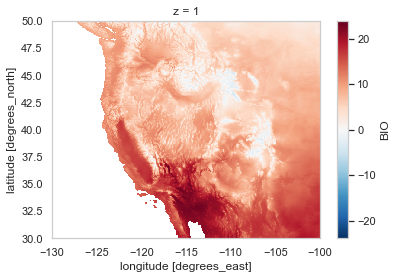

In [14]:
curr_env.BIO[0].plot()

As the region we are using for our study area includes part of the Pacific Ocean, we'll create a land/sea mask. This will be used later to mask out any predictions over the ocean.  This is done quite simple by creating an array with 2's over the ocean (the NaN values in the data) and a second with 1's over the land. Then these are combined into the final mask.

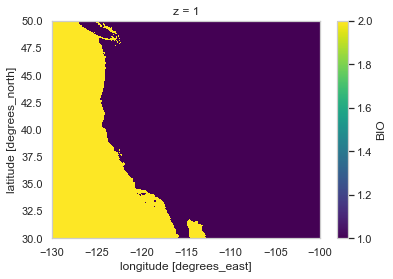

In [15]:
mask_ocean = 2 * np.ones((curr_env.dims['latitude'], 
                          curr_env.dims['longitude'])) * np.isnan(curr_env.BIO.isel(z=0))  
mask_land = 1 * np.ones((curr_env.dims['latitude'], 
                         curr_env.dims['longitude'])) * np.isfinite(curr_env.BIO.isel(z=0))  
mask_array = mask_ocean + mask_land
mask_array.plot()

We also have the same data for the future (2080 under a high emissions climate scenario), so let's load that as well. Once we have built our model, we can then predict the distribution of Pinus edulis under this changed climate. 

In [16]:
future_env = xr.open_dataset('../datafiles/future_env.nc')
future_env.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (latitude: 480, longitude: 720, z: 19)
Coordinates:
  * longitude  (longitude) float64 -130.0 -129.9 -129.9 ... -100.1 -100.1 -100.0
  * latitude   (latitude) float64 49.98 49.94 49.9 49.85 ... 30.1 30.06 30.02
  * z          (z) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    crs        int32 ...
    BIO        (z, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-03-10 13:48:41>

Now we have the presence and absence points, we need to extract the environmental values for these points (these will be a features for machine learning). To do this we use the following steps:

- Create sets of coordinates for the presence/absence data in `xarray` format
- Use the `sel()` method to extract the associated climate values from the environmental grids for these coordinates
- Convert the extracted data to a Pandas DataFrame
- Concatenate the presence/absence data frame with the environmental variables

In [17]:
lons = xr.DataArray(pe.longitude, dims='x')
lats = xr.DataArray(pe.latitude, dims='x')

In [18]:
data = curr_env.BIO.sel(latitude = lats, longitude = lons, method = 'nearest')
data.values

array([[  8. ,   6.4,   5.8, ...,  11.8,  16. ,  11.8],
       [ 16.6,  16.7,  16.2, ...,  17.7,  17.3,  16.8],
       [  4.2,   4.2,   4.2, ...,   4.5,   4.5,   4.2],
       ...,
       [ 34. ,  38. ,  43. , ...,  41. ,  31. ,  41. ],
       [194. , 204. , 214. , ..., 142. , 155. ,  49. ],
       [ 34. ,  38. ,  43. , ...,  47. ,  33. ,  60. ]], dtype=float32)

In [19]:
var_names = ["bio"+str(i+1) for i in range(19)]
x = pd.DataFrame(data.values.transpose(),
                columns = var_names)

In [20]:
pe = pd.concat([pe, x], axis=1)
pe

,longitude,latitude,pa,bio1,bio2,bio3,bio4,bio5,bio6,bio7,...,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,-104.896667,38.866005,1,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,...,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
1,-104.883196,38.875486,1,6.4,16.700001,4.2,778.099976,27.000000,-12.1,39.099998,...,16.700001,-3.2,452.0,76.0,10.0,59.0,204.0,38.0,204.0,38.0
2,-104.839340,38.722775,1,5.8,16.200001,4.2,778.000000,26.100000,-12.4,38.500000,...,16.100000,-3.8,474.0,81.0,11.0,58.0,214.0,43.0,214.0,43.0
3,-104.897199,38.864713,1,8.0,16.600000,4.2,789.000000,28.700001,-10.5,39.200001,...,18.500000,-1.7,427.0,73.0,9.0,60.0,194.0,34.0,194.0,34.0
4,-104.855046,38.908459,1,8.2,16.400000,4.1,792.900024,28.900000,-10.2,39.099998,...,18.799999,-1.5,426.0,72.0,9.0,60.0,194.0,34.0,194.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,-102.534971,34.525225,0,13.4,16.700001,4.2,800.900024,32.500000,-6.4,38.900002,...,23.600000,3.0,444.0,74.0,11.0,61.0,203.0,37.0,203.0,37.0
594,-109.901510,39.715135,0,7.9,15.700000,3.4,985.799988,31.299999,-13.6,44.900002,...,20.400000,-5.2,242.0,26.0,14.0,20.0,78.0,45.0,66.0,45.0
595,-106.530940,34.174115,0,11.8,17.700001,4.5,762.299988,31.600000,-6.9,38.500000,...,21.700001,2.1,321.0,64.0,13.0,64.0,164.0,41.0,142.0,47.0
596,-103.782630,32.707550,0,16.0,17.299999,4.5,757.799988,34.500000,-3.6,38.099998,...,25.600000,6.1,358.0,64.0,9.0,66.0,174.0,31.0,155.0,33.0


Before moving on, we'll convert this new DataFrame to a GeoPandas dataframe, so we can make some quick maps of the presence/absence values and one of the associated environmental variables (`bio7`). 

In [21]:
import geopandas as gpd
pe_gpd = gpd.GeoDataFrame(pe, 
                          geometry=gpd.points_from_xy(pe.longitude, pe.latitude), 
                               crs=4326)

<AxesSubplot:>

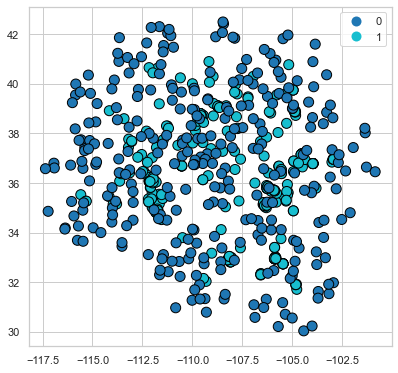

In [22]:
pe_gpd.plot(column="pa", figsize = (6.5, 6.5), categorical=True, 
            markersize = 100, legend=True, edgecolor="black")

<AxesSubplot:>

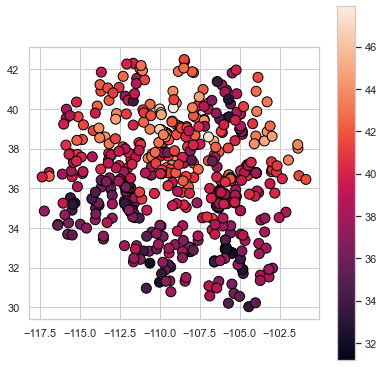

In [23]:
pe_gpd.plot(column="bio7", figsize = (6.5, 6.5), 
            markersize = 100, legend=True, edgecolor="black")

## Tree methods

### Classification and regression trees

Classification and Regression Trees (CART) is a non-linear, non-parametric modeling approach that can be used with a wide variety of data. Regression trees are used with continuous outcome data, and classification trees with binary or categorical data, but the interface for these is the same in scikit-learn.

#### Regression trees

We will start by fitting a regression tree to the California housing data. We first split the data into training and testing sets. For this first example, we'll only model the district median house value as a function of the coordinates:

In [24]:
from sklearn.model_selection import train_test_split

var_names = ['longitude', 'latitude']
X = housing[var_names]
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)

The function that we are going to use is `DecisionTreeRegressor()`, designed for regression tasks. This is a submodule `tree` that contains several tree-based algorithms. Import this, then create a new `DecisionTreeRegressor()` object and use the data to fit it.

In [25]:
from sklearn import tree

ca_tree = tree.DecisionTreeRegressor()
ca_tree = ca_tree.fit(X_train, y_train)

Once fit, we can start to explore the results. If you now use the `export_text()` method, you will see the tree structure in text format. Each line shows a split in tree, with the feature used to split the data (and the values at the split). Values in `[]` represent the value of the `median_house_value` in a terminal node. Splits that are indented represent subsequent partitions.

In [26]:
r = tree.export_text(ca_tree, feature_names = var_names)
print(r)

|--- latitude <= 37.94
|   |--- longitude <= -121.87
|   |   |--- latitude <= 37.59
|   |   |   |--- longitude <= -122.05
|   |   |   |   |--- latitude <= 37.20
|   |   |   |   |   |--- latitude <= 36.99
|   |   |   |   |   |   |--- latitude <= 36.97
|   |   |   |   |   |   |   |--- longitude <= -122.06
|   |   |   |   |   |   |   |   |--- value: [258.30]
|   |   |   |   |   |   |   |--- longitude >  -122.06
|   |   |   |   |   |   |   |   |--- value: [226.50]
|   |   |   |   |   |   |--- latitude >  36.97
|   |   |   |   |   |   |   |--- longitude <= -122.09
|   |   |   |   |   |   |   |   |--- value: [350.00]
|   |   |   |   |   |   |   |--- longitude >  -122.09
|   |   |   |   |   |   |   |   |--- value: [320.90]
|   |   |   |   |   |--- latitude >  36.99
|   |   |   |   |   |   |--- longitude <= -122.06
|   |   |   |   |   |   |   |--- longitude <= -122.17
|   |   |   |   |   |   |   |   |--- value: [284.10]
|   |   |   |   |   |   |   |--- longitude >  -122.17
|   |   |   |   |   

With the default settings, we get a very large tree, with a lot of splits. There are a number of hyperparameters that allow you to restrict the number of splits. A simple one is `max_depth`, which limits the number of splits down any branch of the tree. Let's set this to 3 and show the results:

In [27]:
ca_tree = tree.DecisionTreeRegressor(max_depth = 3)
ca_tree = ca_tree.fit(X_train, y_train)
r = tree.export_text(ca_tree, feature_names = var_names)
print(r)

|--- latitude <= 37.94
|   |--- longitude <= -121.87
|   |   |--- latitude <= 37.59
|   |   |   |--- value: [322.27]
|   |   |--- latitude >  37.59
|   |   |   |--- value: [263.82]
|   |--- longitude >  -121.87
|   |   |--- latitude <= 34.49
|   |   |   |--- value: [223.29]
|   |   |--- latitude >  34.49
|   |   |   |--- value: [130.07]
|--- latitude >  37.94
|   |--- latitude <= 39.06
|   |   |--- longitude <= -122.38
|   |   |   |--- value: [215.06]
|   |   |--- longitude >  -122.38
|   |   |   |--- value: [141.16]
|   |--- latitude >  39.06
|   |   |--- latitude <= 39.35
|   |   |   |--- value: [120.14]
|   |   |--- latitude >  39.35
|   |   |   |--- value: [86.10]



We can also plot the tree to see its structure. This shows for each node, the splitting condition, the `mse` or error rate, the number of observations in that node and the mean value in the node.  

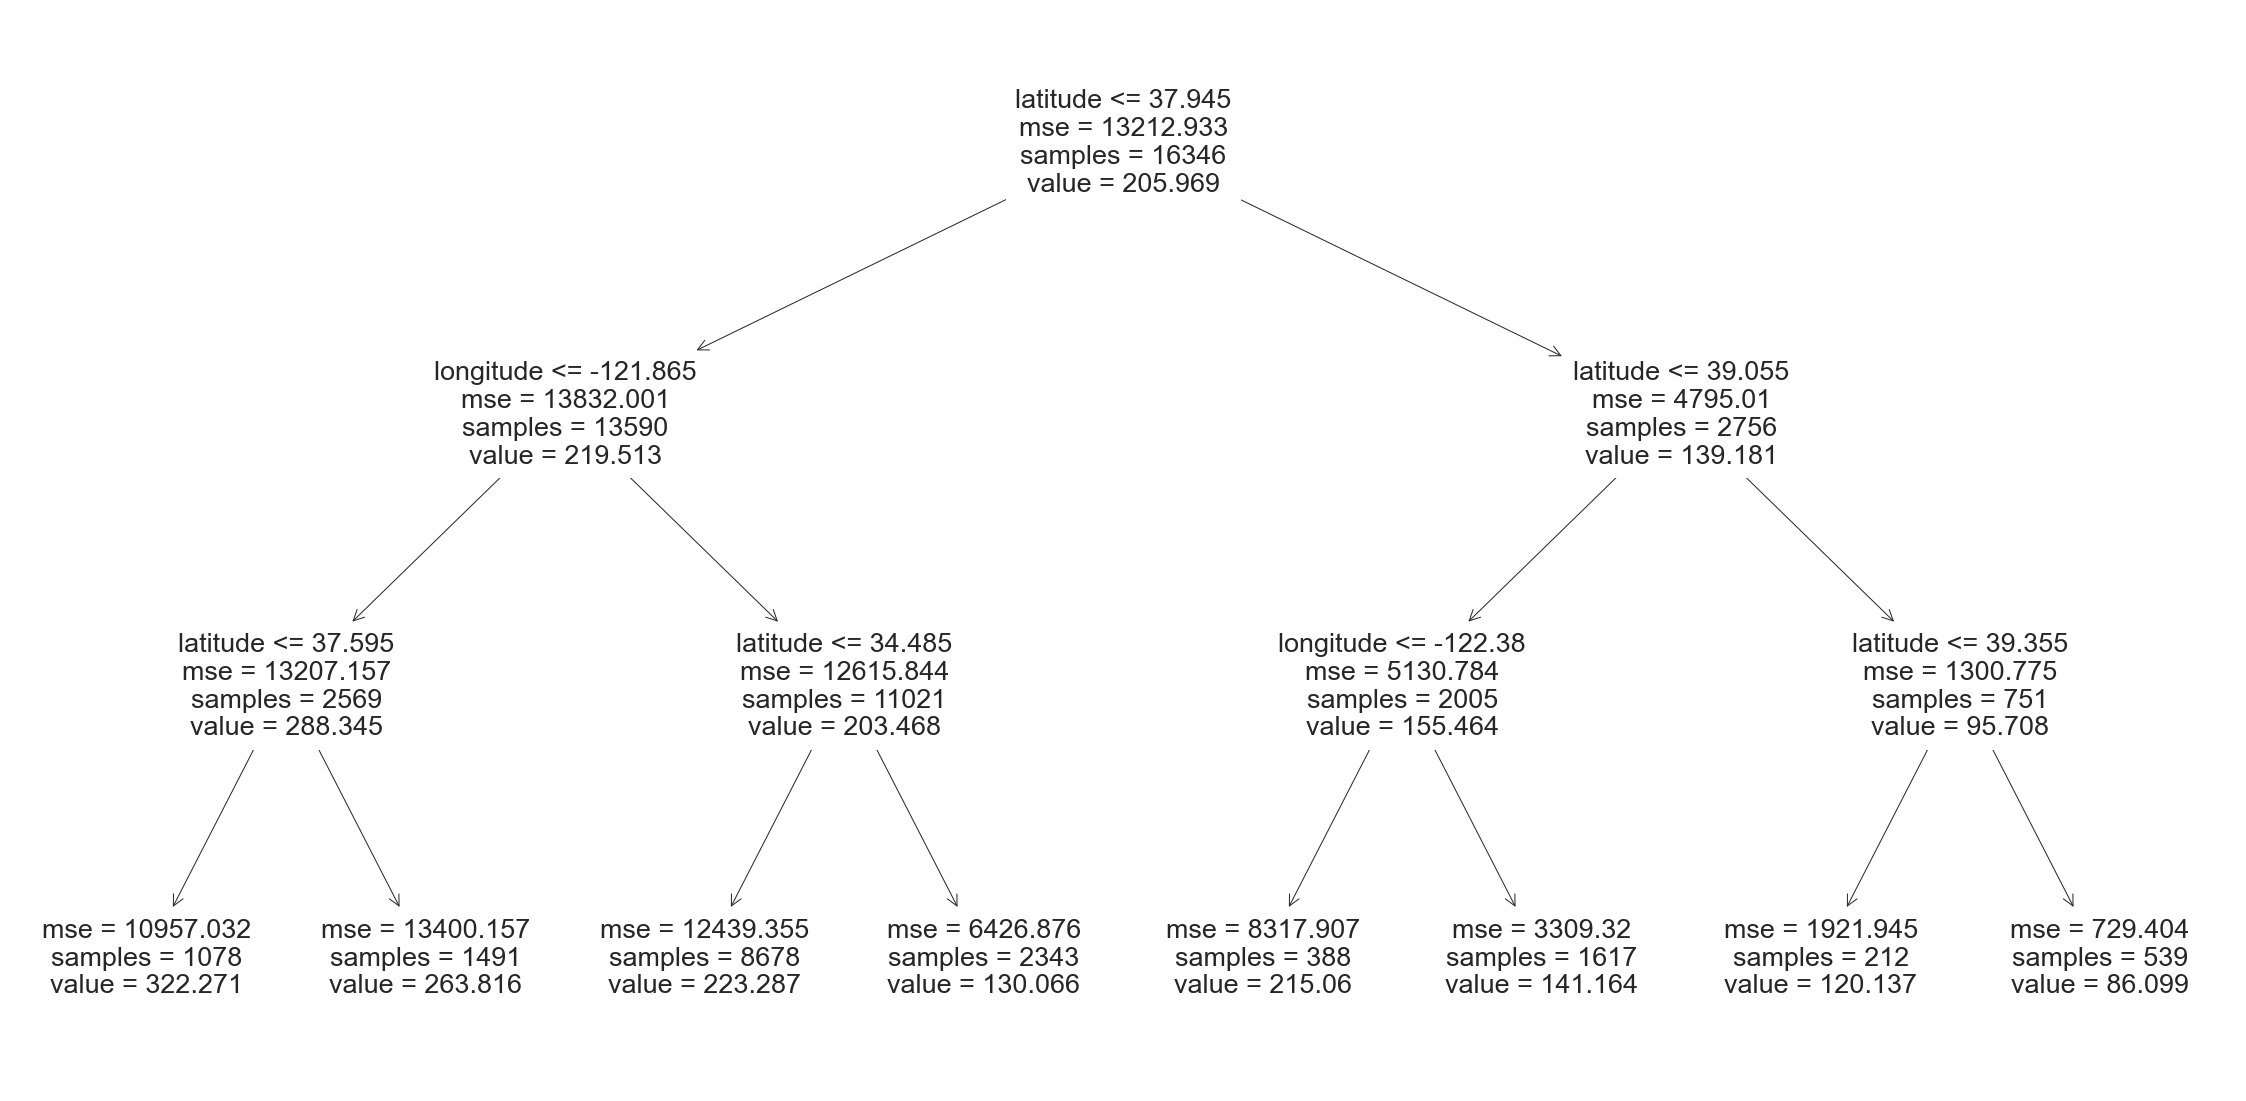

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(40,20)) 
tree.plot_tree(ca_tree, feature_names = var_names)
plt.show()

We can run a quick cross-validation to assess this simple models predictive skill:

In [29]:
from sklearn import metrics

y_test_pred = ca_tree.predict(X_test)
print('Root mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_test_pred, squared = False))

Root mean squared error: 102.15


Let's now remake the tree with the features we have been using before, to see how this changes. 

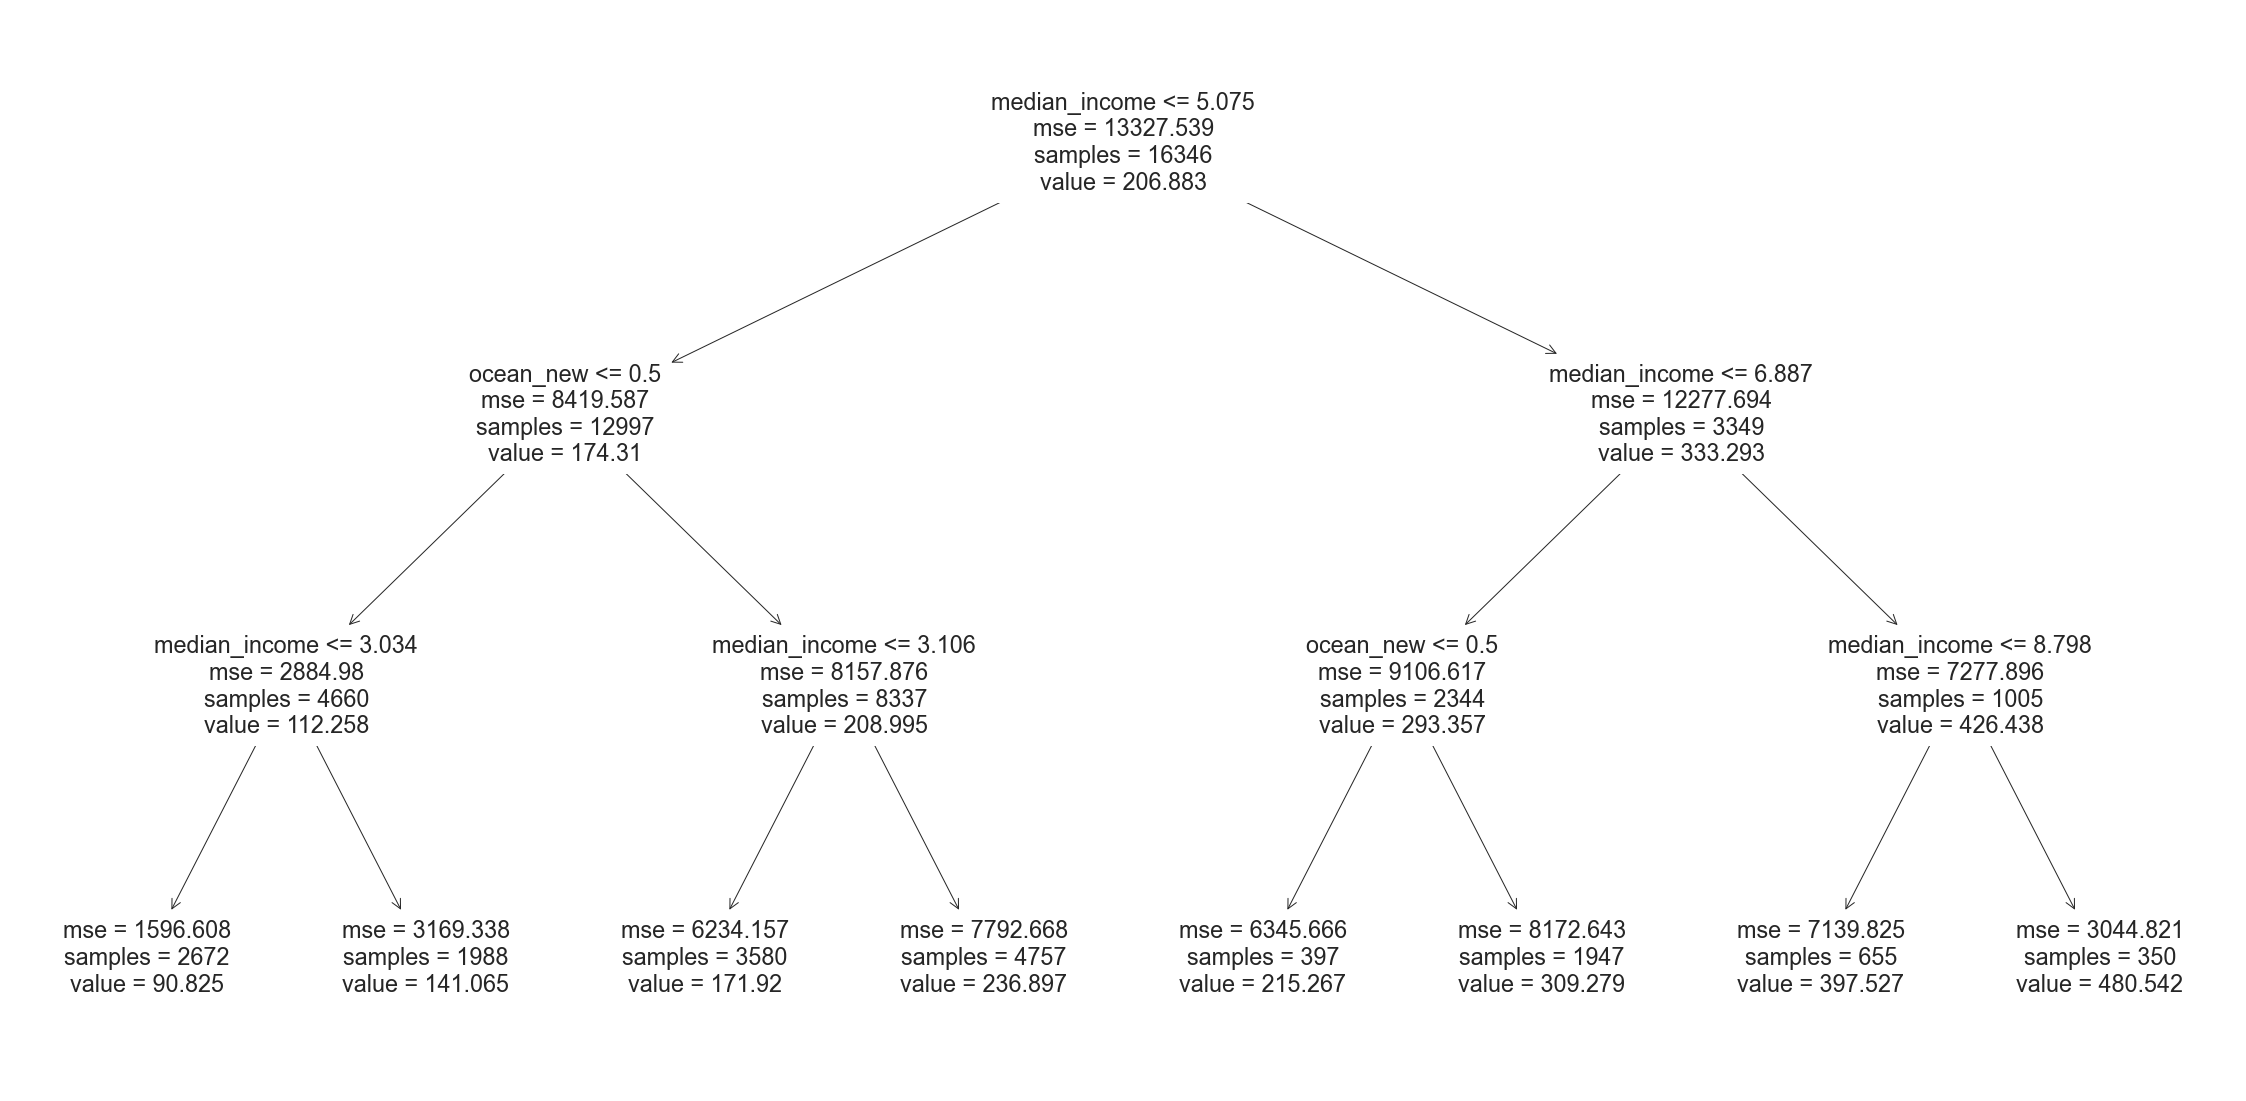

In [30]:
var_names = ['avg_rooms', 'bedroom_ratio', 'housing_median_age',
            'population', 'households', 'median_income', 'ocean_new']
X = housing[var_names]
y = housing['median_house_value']
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)
ca_tree = tree.DecisionTreeRegressor(max_depth = 3)
ca_tree = ca_tree.fit(X_train, y_train)

plt.figure(figsize=(40,20)) 
tree.plot_tree(ca_tree, feature_names = var_names)
plt.show()

This shows a clear and interpretable partitioning of the data, with median income showing as the most important feature in the first split. Let's see if this improves the predictive skill:

In [31]:
y_test_pred = ca_tree.predict(X_test)
print('Root mean squared error: %.2f'
      % metrics.mean_squared_error(y_test, y_test_pred, squared = False))

Root mean squared error: 75.73


#### Classification trees

Next, we'll build a classification model for the *Pinus edulis* data set. First, let's set up the training and testing set using all 19 of the bioclimatic variables:

In [32]:
var_names = ["bio"+str(i+1) for i in range(19)]

X = pe[var_names]
y = pe['pa']

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8)

In [33]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(478, 19)
(478,)
(120, 19)
(120,)


No prizes for guessing that the scikit-learn function for a classification is called `DecisionTreeClassifier()`. Let's initialize one of these, and train it on our dataset

In [34]:
pe_tree = tree.DecisionTreeClassifier()
pe_tree = pe_tree.fit(X_train, y_train)

And plot the resulting tree:

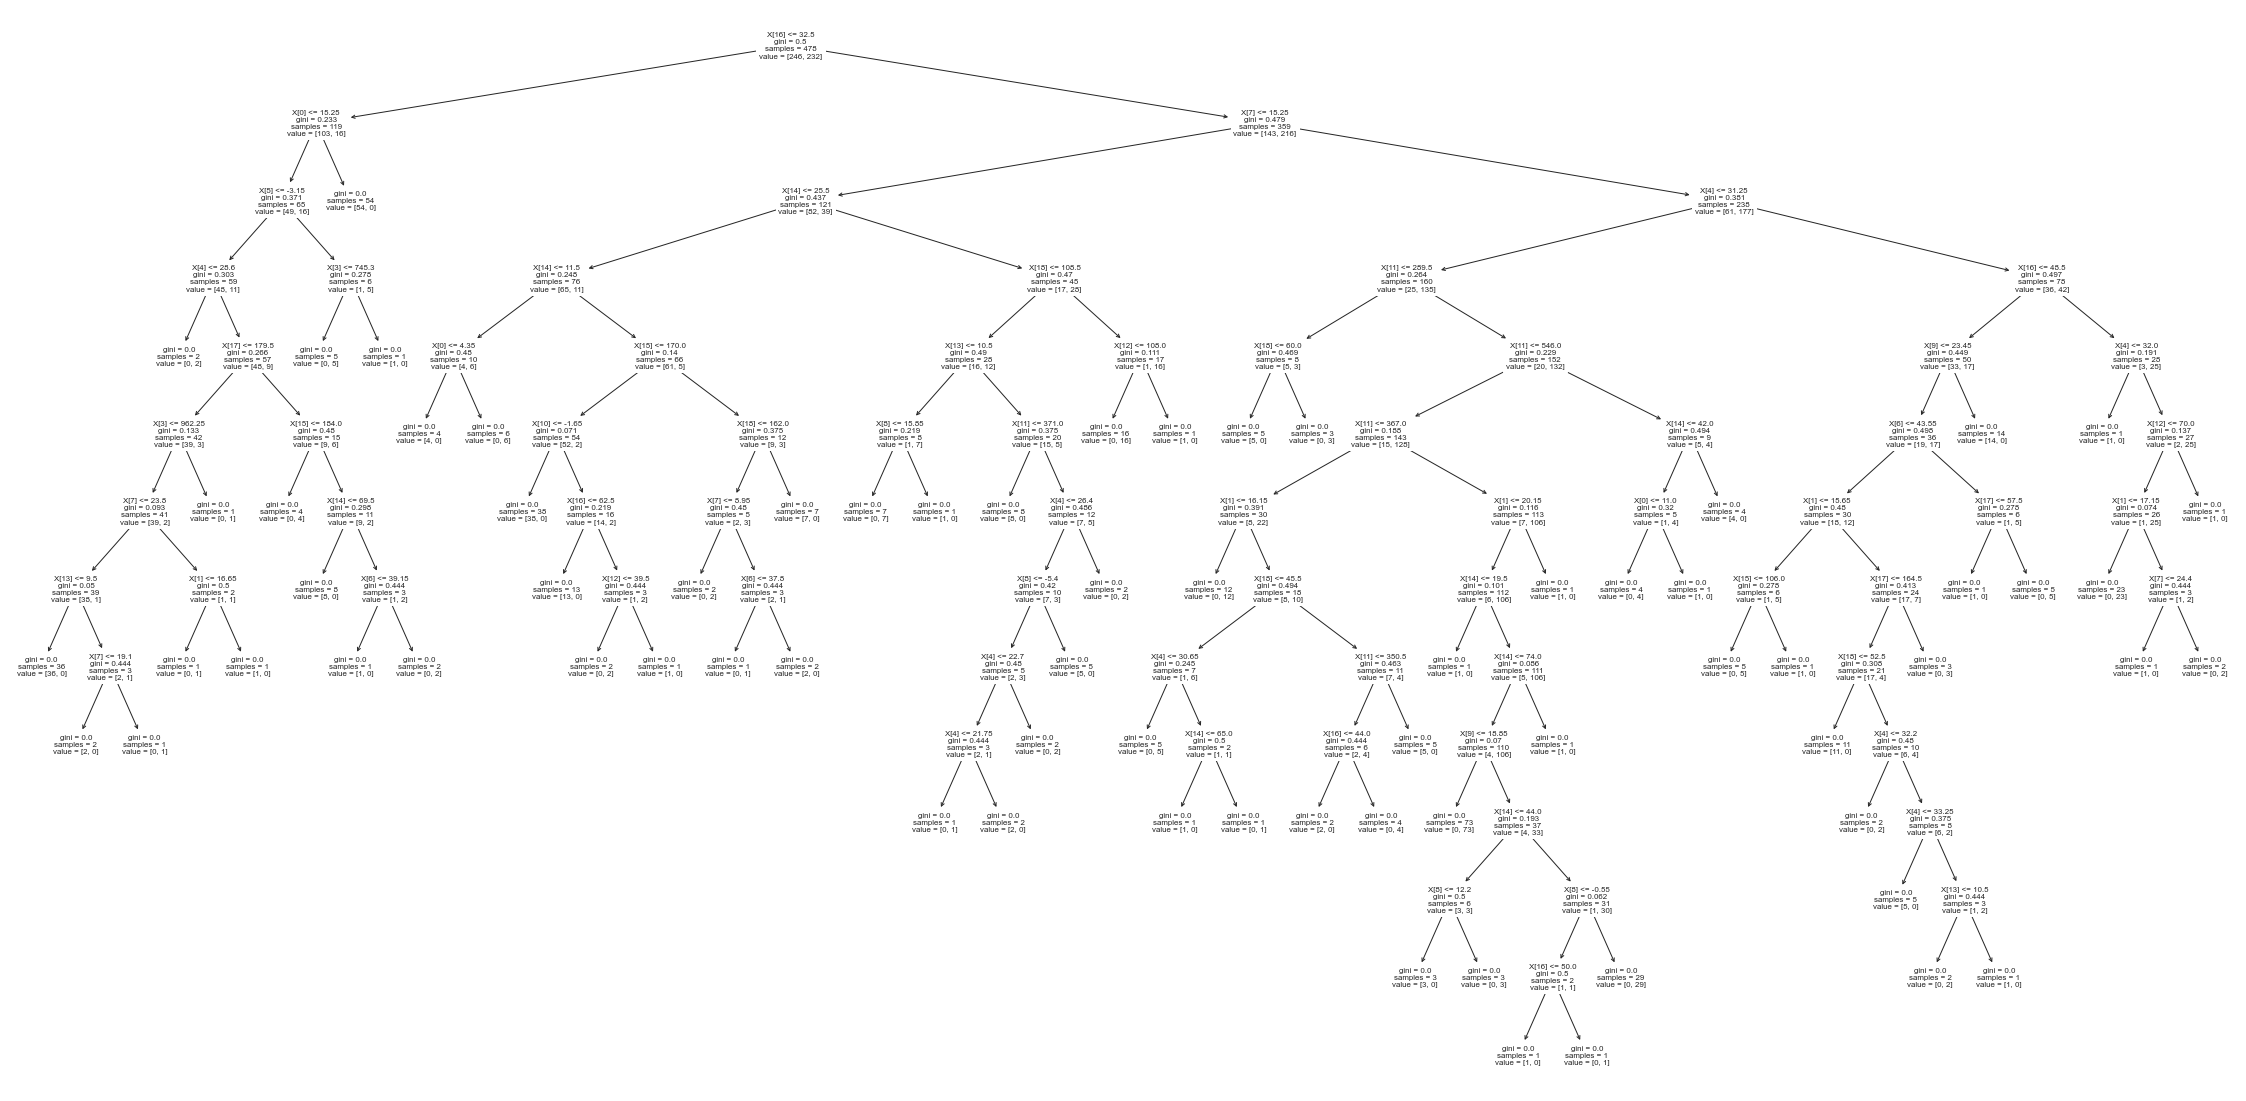

In [35]:
plt.figure(figsize=(40,20)) 
tree.plot_tree(pe_tree)
plt.show()

Again, the default settings results in a very overfit tree. To illustrate this, let's calculate the AUC on the testing set:

In [36]:
y_test_pred = pe_tree.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_test_pred[:,1])

0.7992114897212054

### Tuning

Let's try to improve on this model by tuning it to find the best set of hyperparameters to limit overfitting. You can get the list of available hyperparameters for any scikit-learn model using `get_params()`

In [37]:
tree.DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

There are several here that we could try to tune, but we'll focus on two that are important in limiting tree size:

- `max_depth`: the maximum number of splits along any branch of the tree
- `min_samples_leaf`: the minimum number of samples in a child node for it to be considered in the splitting procedure

We'll use a scikit-learn function to help with the tuning called `GridSearchCV()`. As the name might imply, this will carry out a cross-validated search among a set of hyperparameter values to find the best value. Practically, this takes the dataset, splits it into training and testing, builds several models with different parameter values and predicts for the test set. The best values are then saved and returned. 

After importing the function, we need to define the parameter space that will be searched. This is set up as a Python dictionary, with the name of the hyperparameter as the key, and the value or set of values to be tested. Any parameters that are not specified will be held at their default values. 

In [38]:
from sklearn.model_selection import GridSearchCV
tree_param = {'max_depth':[4,5,6,7,8,9,10],
             'min_samples_leaf':[5,6,7,8,9,10]}

Having done this, we set up the cross-validation strategy using `GridSearchCV()`. We need to specify:

- The algorithm to be tuned
- The parameter space
- The performance metric to be used to select the parameter values
- The cross-validation strategy. Here we are using a simple 5-fold cross-validation, but it is possible to replace this with more complex strategies

In [39]:
pe_tree_tuned = GridSearchCV(tree.DecisionTreeClassifier(), tree_param, 
                             scoring='roc_auc', cv=5)

Now we use the standard scikit-learn `fit()` method to run the tuning

In [40]:
pe_tree_tuned.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9, 10],
                         'min_samples_leaf': [5, 6, 7, 8, 9, 10]},
             scoring='roc_auc')

The full set of results are held in `pe_tree_tuned.cv_results_`, but we'll just show here the range of AUC scores found during tuning. These vary a little (from just under 0.8 to about 0.83). Tuning has a relatively small impact on decision trees, so this small range is not too surprising.

In [41]:
print(pe_tree_tuned.cv_results_['mean_test_score'])

[0.79858285 0.79452944 0.79648494 0.81372042 0.81709787 0.82191672
 0.80230824 0.79731105 0.79120742 0.82041707 0.81139918 0.80661717
 0.78959272 0.8009387  0.78506039 0.81226519 0.80674283 0.80877747
 0.77980825 0.7937828  0.79238445 0.80505954 0.80426833 0.7985234
 0.78268617 0.79011937 0.78483404 0.7968531  0.8110471  0.79994093
 0.78088488 0.78464436 0.79531807 0.80073509 0.80548812 0.80000527
 0.77376199 0.79351815 0.80869497 0.80703402 0.79847773 0.79992809]


We can also extract the `best_estimator`, i.e. the best tree that was built to see the parameters that were used, and the score it obtained. 

In [42]:
print(pe_tree_tuned.best_estimator_)
print(pe_tree_tuned.best_score_)

DecisionTreeClassifier(max_depth=4, min_samples_leaf=10)
0.8219167248768148


In [43]:
print('Best max_depth:', pe_tree_tuned.best_estimator_.get_params()['max_depth'])
print('Best min_samples_leaf:', pe_tree_tuned.best_estimator_.get_params()['min_samples_leaf'])

Best max_depth: 4
Best min_samples_leaf: 10


Finally, let's re-predict for our test set and see if we've improved on the original default model

In [44]:
y_test_pred = pe_tree_tuned.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_test_pred[:,1])

0.8710222472542946

## Random forest

Next, we'll build a random forest for the Pinus data. scikit-learn's random forest functions are found in the `ensemble` sub-module. Let's import this and then set up, train and test a random forest classifier. 

In [45]:
from sklearn import ensemble

In [46]:
pe_rf = ensemble.RandomForestClassifier()
pe_rf.fit(X_train, y_train)
y_test_pred = pe_rf.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_test_pred[:,1])

0.9404393128696142

Even with its default settings, this model shows a decent improvement over the decision tree. We'll now try to tune it. First, look at the available parameters:

In [47]:
ensemble.RandomForestClassifier().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

Again, there are several hyperparameters that we could tune. We'll focus again on two: `n_estimators` (the number of trees in the forest) and `max_features` (the number of randomly selected features used for each split)

In [48]:
rf_param = {'n_estimators':[100, 200, 300, 400, 500],
             'max_features':[2,4,6]}

We now run our tuning grid search using these parameters and a random forest:

In [49]:
pe_rf_tuned = GridSearchCV(ensemble.RandomForestClassifier(), rf_param, 
                             scoring='roc_auc', cv=5)
pe_rf_tuned.fit(X_train, y_train)
print(pe_rf_tuned.cv_results_['mean_test_score'])

[0.88392273 0.88622887 0.88369135 0.88454256 0.88658774 0.87755353
 0.88195764 0.88498203 0.88159999 0.88211416 0.8806609  0.88254332
 0.88104774 0.87864819 0.88057641]


And look at the best fitting model:

In [50]:
print(pe_rf_tuned.best_estimator_)
print(pe_rf_tuned.best_score_)

RandomForestClassifier(max_features=2, n_estimators=500)
0.8865877399988673


Now let's see if tuning the model has improved over the default (I got a very slight improvement, but your mileage may vary):

In [51]:
y_test_pred = pe_rf_tuned.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_test_pred[:,1])

0.9433962264150944

#### Variable importance

Next we'll plot the permutation-based variable importance for this model. As a reminder, variable importance is a measure of how much worse a model becomes when we scramble the values of one of the features. The model is used to predict the outcome for some test data (here the out-of-bag samples) twice: once with the original values of the feature and once with randomly shuffled values. If there is a large difference in the skill of the model, this feature is important in controlling the outcome. 

As the result of the grid-based tuning includes the best estimator, we'll use this to get the variable importance values as follows:

In [52]:
pe_rf_tuned.best_estimator_.feature_importances_

array([0.0715693 , 0.0425168 , 0.03285441, 0.0541909 , 0.06857142,
       0.05138017, 0.05211817, 0.0645557 , 0.04539175, 0.06333311,
       0.06089406, 0.05654177, 0.03857883, 0.04362777, 0.04807298,
       0.03904666, 0.07298541, 0.04636122, 0.04740956])

As this is a just an array, it is a little difficult to parse out any differences. Instead, we'll sort them and print them together with the feature names:

In [53]:
importances = pe_rf_tuned.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], var_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 16 bio17 (0.072985)
2. feature 0 bio1 (0.071569)
3. feature 4 bio5 (0.068571)
4. feature 7 bio8 (0.064556)
5. feature 9 bio10 (0.063333)
6. feature 10 bio11 (0.060894)
7. feature 11 bio12 (0.056542)
8. feature 3 bio4 (0.054191)
9. feature 6 bio7 (0.052118)
10. feature 5 bio6 (0.051380)
11. feature 14 bio15 (0.048073)
12. feature 18 bio19 (0.047410)
13. feature 17 bio18 (0.046361)
14. feature 8 bio9 (0.045392)
15. feature 13 bio14 (0.043628)
16. feature 1 bio2 (0.042517)
17. feature 15 bio16 (0.039047)
18. feature 12 bio13 (0.038579)
19. feature 2 bio3 (0.032854)


And we can also plot the values as a bar plot:

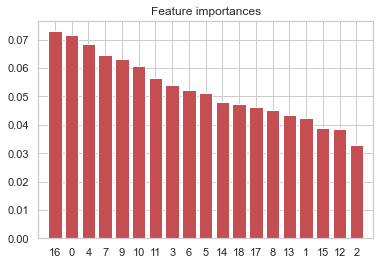

In [54]:
# Plot the impurity-based feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
        color="r", align="center")
plt.xticks(range(X.shape[1]), indices)
plt.xlim([-1, X.shape[1]])
plt.show()

We can look at the form of the relationship between the occurrence of the pine and this feature (and any other one) using a partial dependency plot. This shows changes in the outcome across the range of some feature (with all other features held constant). Here, we'll use the `plot_partial_dependence()` function from the the `inspection` submoduleto produce the plot. As arguments, this requires the model, the DataFrame or array used to build the model, and the feature that you want to show. This will take an array of feature indices, allowing you to plot several dependency plots together.


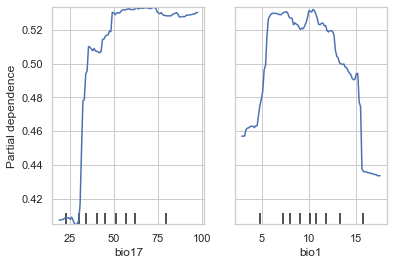

In [78]:
from sklearn.inspection import plot_partial_dependence
plot_partial_dependence(pe_rf_tuned.best_estimator_, X, [16,0]) 

The two features here are `bio17` (precipitation of driest quarter) and `bio1` (mean annual temperature. The first of these shows a clear threshold effect, with an abrupt drop in suitability as this drops below about 30. The second show more of an optimum between values of about 6 and 10 degrees.

### XGBoost

We will now build a boosted regression tree model for the Pinus data. In contrast to random forests that build a set of individual weak trees, boosted regression trees (BRTs) start with a single weak tree and iteratively improve on this. This is done by targeting the residuals from the previous set of models and trying to model that in the next tree. While this can make these methods very powerful, it is easy for them to overfit the data, and hyperparameter tuning becomes very important here. 

While scikit-learn has its own implementation of boosted regression, an alternative is through the xgboost library. This has a number of advantages with memory management and parallelization which can greatly speed up fitting these models, and we'll use this. It has a very similar interface to scikit-learn, so we can just reuse the data and tuning approaches from previous models. As before, we'll start by simply running it with the default settings:

In [80]:
from xgboost import XGBClassifier
pe_xgb = XGBClassifier()
pe_xgb.fit(X_train, y_train)
y_test_pred = pe_xgb.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_test_pred[:,1])

[17:38:23] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


0.9090397071247536

Now we'll try to tune it. First, get a list of available parameters

In [81]:
XGBClassifier().get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

Well, there's a lot. A thorough search strategy would probably include some of the following parameters:

In [57]:
# Define our search space for grid search
xgb_param = {
            'max_depth': [3, 4, 5],
            'learning_rate': [0.1, 0.2, 0.3],
            'n_estimators': [50, 100, 150],
            'gamma': [0, 0.1, 0.2],
            'min_child_weight': [0, 0.5, 1],
            'max_delta_step': [0],
            'subsample': [0.7, 0.8, 0.9, 1],
            'colsample_bytree': [0.6, 0.8, 1],
            'colsample_bylevel': [1],
            'reg_alpha': [0, 1e-2, 1, 1e1],
            'reg_lambda': [0, 1e-2, 1, 1e1],
            'base_score': [0.5]
            }

In the interest of keeping this relatively fast, we'll just test the following parameters, each with a fairly coarse grid. In practice, you'd want to do this more exhaustively. 

- `max_depth`: the number of splits in each tree
- `learning_rate`: the contribution of each tree to the overall model
- `n_estimators`: the total number of trees built

We also set the parameter `subsample` to 0.5 to only use a random selection of observations in building each tree. As this is a constant, it won't be varied during the grid search. Once this is setup, we'll run the usual cross-validated grid search. You might see a few warnings appear, you can safely ignore these.

In [91]:
xgb_param = {
    'max_depth': [1, 3, 5],
    'learning_rate': [0.1, 0.2, 0.3],
    'n_estimators': [100, 300, 500],
    'subsample': [0.5], 
    'eval_metric': ['logloss']
}

pe_xgb_tuned = GridSearchCV(XGBClassifier(), xgb_param, 
                             scoring='roc_auc', cv=5, verbose = 0)
pe_xgb_tuned.fit(X_train, y_train)

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/opt/miniconda3/envs/geog5160/lib/python3.9/site-packages/xgboos

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None,

In [92]:
print(pe_xgb_tuned.best_estimator_)
print(pe_xgb_tuned.best_score_)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='logloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=300, n_jobs=8,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=0.5, tree_method='exact',
              validate_parameters=1, verbosity=None)
0.8862975325190205


Now run the model to predict for our test samples. This does give a small but notable increase over the un-tuned model. 

In [93]:
y_test_pred = pe_xgb_tuned.predict_proba(X_test)
metrics.roc_auc_score(y_test, y_test_pred[:,1])

0.9214305829343846

We can again extract the variable importance scores from the tuned model, which again shows `bio17` as being the most importance feature. 

In [61]:
importances = pe_xgb_tuned.best_estimator_.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d %s (%f)" % (f + 1, indices[f], var_names[indices[f]], importances[indices[f]]))

Feature ranking:
1. feature 16 bio17 (0.190821)
2. feature 7 bio8 (0.090489)
3. feature 4 bio5 (0.077208)
4. feature 14 bio15 (0.067974)
5. feature 0 bio1 (0.060514)
6. feature 9 bio10 (0.047096)
7. feature 17 bio18 (0.046398)
8. feature 1 bio2 (0.046245)
9. feature 2 bio3 (0.041431)
10. feature 6 bio7 (0.041193)
11. feature 18 bio19 (0.038519)
12. feature 5 bio6 (0.035958)
13. feature 15 bio16 (0.034812)
14. feature 11 bio12 (0.033764)
15. feature 10 bio11 (0.033562)
16. feature 12 bio13 (0.030715)
17. feature 8 bio9 (0.028594)
18. feature 13 bio14 (0.028119)
19. feature 3 bio4 (0.026587)


## Predictions

In [62]:
curr_env.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (latitude: 480, longitude: 720, z: 19)
Coordinates:
  * longitude  (longitude) float64 -130.0 -129.9 -129.9 ... -100.1 -100.1 -100.0
  * latitude   (latitude) float64 49.98 49.94 49.9 49.85 ... 30.1 30.06 30.02
  * z          (z) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19
Data variables:
    crs        int32 ...
    BIO        (z, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.4
    created_by:   R, packages ncdf4 and raster (version 3.4-5)
    date:         2021-03-10 13:49:36>

In [63]:
bio_stack = curr_env.BIO.stack(dim = ['latitude', 'longitude'])
print(bio_stack.values)
print(bio_stack.shape)
print(bio_stack.dim.values)

[[  nan   nan   nan ...  18.2  18.2  17.9]
 [  nan   nan   nan ...  14.3  14.4  14.4]
 [  nan   nan   nan ...   4.2   4.2   4.2]
 ...
 [  nan   nan   nan ...  86.   87.   89. ]
 [  nan   nan   nan ... 204.  205.  208. ]
 [  nan   nan   nan ...  87.   87.   89. ]]
(19, 345600)
[(49.979166666666664, -129.97916666666666) (49.979166666666664, -129.9375)
 (49.979166666666664, -129.89583333333334) ...
 (30.020833333333336, -100.10416666666667) (30.020833333333336, -100.0625)
 (30.020833333333336, -100.02083333333334)]


In [64]:
curr_crds = pd.DataFrame(bio_stack.dim.values)
curr_crds

,0
0,"(49.979166666666664, -129.97916666666666)"
1,"(49.979166666666664, -129.9375)"
2,"(49.979166666666664, -129.89583333333334)"
3,"(49.979166666666664, -129.85416666666666)"
4,"(49.979166666666664, -129.8125)"
...,...
345595,"(30.020833333333336, -100.1875)"
345596,"(30.020833333333336, -100.14583333333334)"
345597,"(30.020833333333336, -100.10416666666667)"
345598,"(30.020833333333336, -100.0625)"


In [65]:
curr_env_df = pd.DataFrame(bio_stack.values.transpose(),
                columns = var_names)
curr_env_df

,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
345595,18.100000,14.1,4.3,659.000000,33.500000,0.8,32.700001,23.000000,10.2,26.000000,9.1,625.0,81.0,22.0,39.0,216.0,82.0,201.0,84.0
345596,18.200001,14.2,4.2,668.299988,33.700001,0.6,33.099998,23.100000,10.1,26.200001,9.0,633.0,82.0,23.0,39.0,218.0,84.0,202.0,85.0
345597,18.200001,14.3,4.2,673.599976,33.799999,0.4,33.400002,23.100000,10.0,26.299999,9.0,638.0,82.0,24.0,39.0,220.0,86.0,204.0,87.0
345598,18.200001,14.4,4.2,680.200012,33.900002,0.3,33.599998,23.100000,10.0,26.400000,8.9,644.0,83.0,24.0,39.0,222.0,87.0,205.0,87.0


In [66]:
y_test_pred = pe_rf_tuned.predict_proba(X_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_pred[:,1])
threshold_rf = thresholds[np.argmax(tpr - fpr)]
print(threshold_rf)

0.536


In [67]:
x = pe_rf_tuned.predict_proba(curr_env_df.fillna(0))
x.shape

(345600, 2)

In [68]:
curr_pred = xr.DataArray(x[:,1].reshape(480,720), 
                         coords=[curr_env.coords['latitude'], 
                                 curr_env.coords['longitude']])

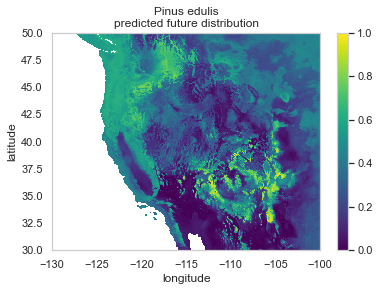

In [69]:
curr_pred.where(mask_array == 1).plot()
plt.title("Pinus edulis\npredicted future distribution")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

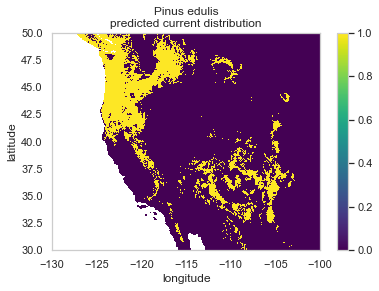

In [70]:
curr_pa = curr_pred > threshold_rf

curr_pa.where(mask_array == 1).plot()
plt.title("Pinus edulis\npredicted current distribution")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

### Future climate

In [71]:
bio_stack = future_env.BIO.stack(dim = ['latitude', 'longitude'])
future_env_df = pd.DataFrame(bio_stack.values.transpose(),
                columns = var_names)
future_crds = pd.DataFrame(bio_stack.dim.values)

In [72]:
x = pe_rf_tuned.predict_proba(future_env_df.fillna(0))
future_pred = xr.DataArray(x[:,1].reshape(480,720), 
                         coords=[future_env.coords['latitude'], 
                                 future_env.coords['longitude']])

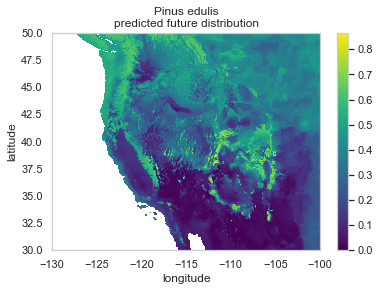

In [73]:
future_pred.where(mask_array == 1).plot()
plt.title("Pinus edulis\npredicted future distribution")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

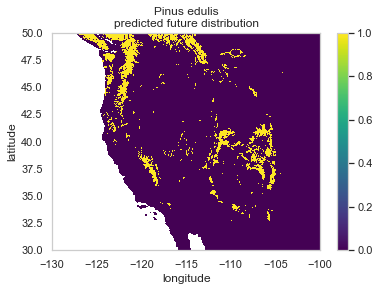

In [74]:
future_pa = future_pred > threshold_rf

future_pa.where(mask_array == 1).plot()
plt.title("Pinus edulis\npredicted future distribution")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

In [75]:
future_pred.astype('int')

<xarray.DataArray (latitude: 480, longitude: 720)>
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])
Coordinates:
  * latitude   (latitude) float64 49.98 49.94 49.9 49.85 ... 30.1 30.06 30.02
  * longitude  (longitude) float64 -130.0 -129.9 -129.9 ... -100.1 -100.1 -100.0

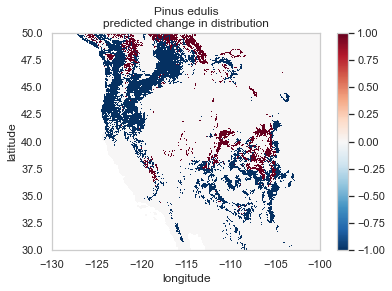

In [76]:
change_pa = future_pa.astype('int') - curr_pa.astype('int')
change_pa.where(mask_array == 1).plot()
plt.title("Pinus edulis\npredicted change in distribution")
plt.xlabel("longitude")
plt.ylabel("latitude")
plt.show()

## Exercise

In a previous lab, you used data from the *Sonar.csv* file to model types of object (rocks 'R' or mines 'M') using the values of a set of frequency bands. The exercise for this lab is to use one of the ensemble methods (random forest *or* boosted regression trees) to produce a new model of these data. You should use **mlr3** package, and you need to do the following:

- Set up a task, learner, outer resampling strategy and performance measure
- Use the `AutoTuner` to tune your model
- Report the AUC score for the tuned model
- Produce a variable importance plot

In addition, your answer should include your R code. 

## Appendix 1: Bioclimate variables

- BIO1 = Annual Mean Temperature
- BIO2 = Mean Diurnal Range (Mean of monthly (max temp - min temp))
- BIO3 = Isothermality (BIO2/BIO7) (* 100)
- BIO4 = Temperature Seasonality (standard deviation *100)
- BIO5 = Max Temperature of Warmest Month
- BIO6 = Min Temperature of Coldest Month
- BIO7 = Temperature Annual Range (BIO5-BIO6)
- BIO8 = Mean Temperature of Wettest Quarter
- BIO9 = Mean Temperature of Driest Quarter
- BIO10 = Mean Temperature of Warmest Quarter
- BIO11 = Mean Temperature of Coldest Quarter
- BIO12 = Annual Precipitation
- BIO13 = Precipitation of Wettest Month
- BIO14 = Precipitation of Driest Month
- BIO15 = Precipitation Seasonality (Coefficient of Variation)
- BIO16 = Precipitation of Wettest Quarter
- BIO17 = Precipitation of Driest Quarter
- BIO18 = Precipitation of Warmest Quarter
- BIO19 = Precipitation of Coldest Quarter
